<h2>Maximum Likelihood Estimation</h2>
The goal of maximum likelihood is to find the optimal way to fit a distribution to a data set. There are different distributions for different types of data (normal, exponential, uniform, gamma (chi square) etc).

we want to maximise the likelihood that the distribution we choose is able to observe all of the data. Likelihood and probability are used interchangeably in common parlance, but in the world of statistics if likelihood is mentioned they are (very probably) talking specifically about this kind of likelihood maximisation.<br>
Similar to how cross validation is used to compare several models, max likelihood estimation functions are likely used for several distributions to see which might be the best fit for some given data.
<br>
<h3>Parameter Estimation (why it is important)</h3>Parameters are descriptive measures of an entire population. However, their values are usually unknown because it is infeasible to measure an entire population. Because of this, you can take a random sample from the population to obtain parameter estimates. Parameter Estimations are generated as part of the standard Max Likelihood Estimation function in R.

In [1]:
library(tidyverse)
library(e1071)
library(distr)
library(FAmle)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.1          ✔ dplyr   0.8.1     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: startupmsg
Utilities for Start-Up Messages (version 0.9.6)
For more information see ?"startupmsg", NEWS("startupmsg")

Loading required package: sfsmisc

Attaching package: ‘sfsmisc’

The following object is masked from ‘package:dplyr’:

    last

Object Oriented Implementation of Distributions (version 2.8.0)
Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global opti

In [2]:
df_heart = read_csv('/kaggle/input/heart.csv')

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


In [3]:
head(df_heart,4)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


-----------------------------------------
       Maximum Likelihood Estimates
-----------------------------------------
Data object:  x 
Distribution:  weibull 

--------- Parameter estimates -----------

         shape.hat scale.hat
Estimate    7.8981   159.140
Std.err     0.3591     1.218

---------- Goodness-of-Fit --------------

  log.like        aic         ad        rho 
-1368.3554  2740.7107     0.5507     0.9979 
-----------------------------------------

[1] "fit"       "x.info"    "dist"      "par.hat"   "cov.hat"   "k"        
 [7] "n"         "log.like"  "aic"       "ad"        "data.name" "rho"

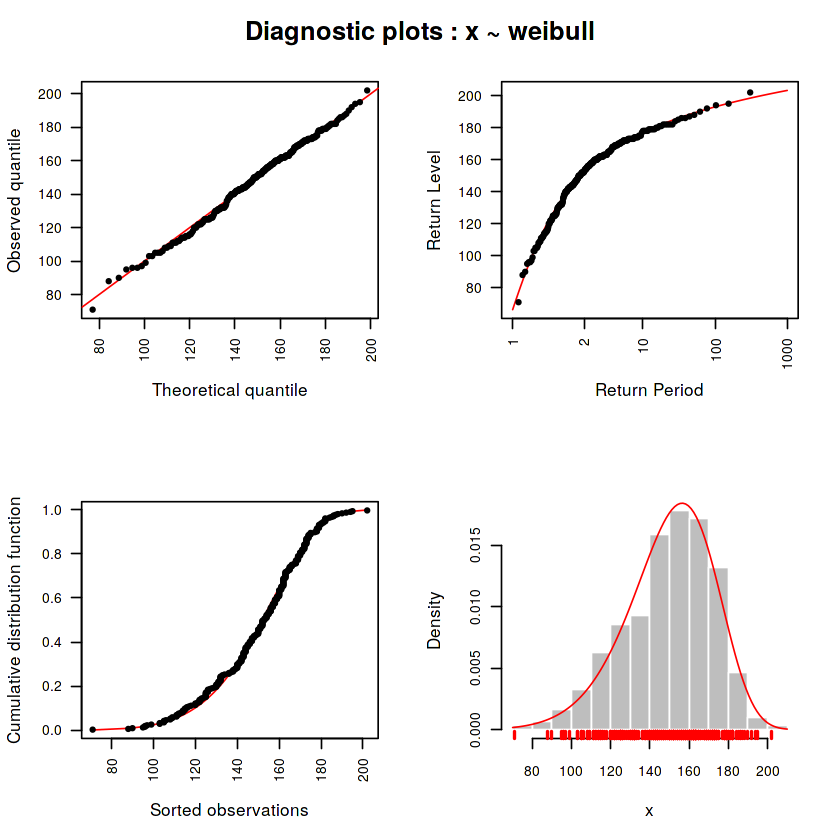

[1] 176.8646 182.8567 193.0878

,p = 0.9,p = 0.95,p = 0.99
low-0.5%,173.3719,178.9609,188.2647
Estimate,176.8646,182.8567,193.0878
up-99.5%,180.3572,186.7526,197.9109


,p = 0.9,p = 0.95,p = 0.99
low-0.5%,173.4061,179.0021,188.3244
Estimate,176.8646,182.8567,193.0878
up-99.5%,180.3919,186.7944,197.9716


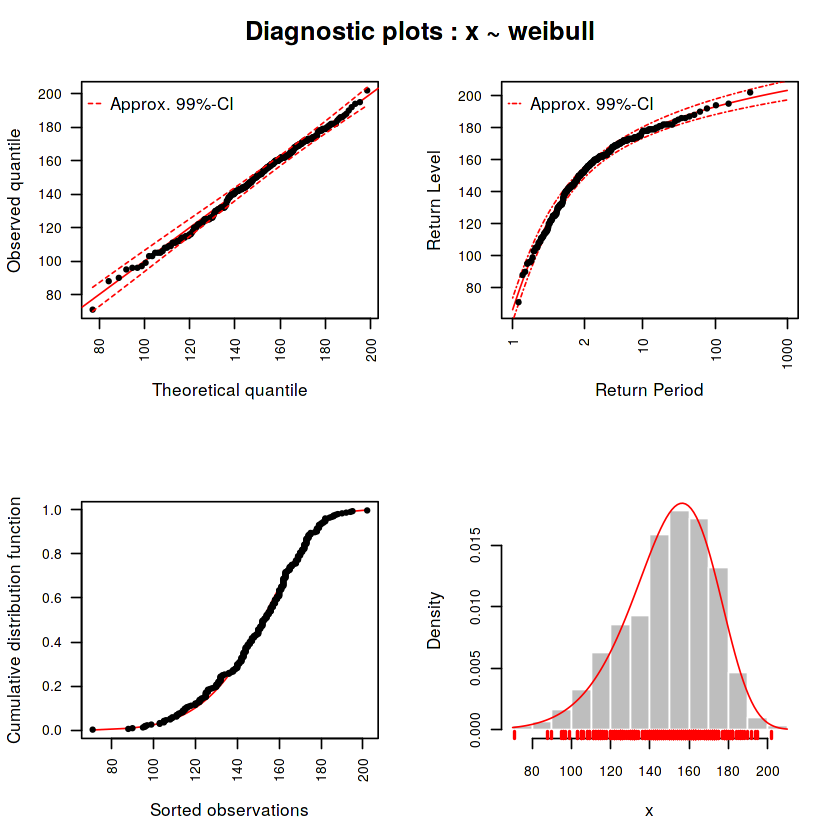

In [4]:
#weibull is a continuous distribution, a special case of a gamma style distribution
x <- df_heart$thalach
fit.x <- mle(x,'weibull',c(.1,.1))
fit.x
names(fit.x)
plot(fit.x)
plot(fit.x,TRUE,alpha=.01)
p <- c(.9,.95,.99)
distr(p,model=fit.x,type='q')
Q.conf.int(p,fit.x,.01)
Q.conf.int(p,fit.x,.01,TRUE)

[1] 149.6469

-----------------------------------------
       Maximum Likelihood Estimates
-----------------------------------------
Data object:  x 
Distribution:  norm 

--------- Parameter estimates -----------

         mean.hat  sd.hat
Estimate  149.809 22.8512
Std.err     1.313  0.9273

---------- Goodness-of-Fit --------------

  log.like        aic         ad        rho 
-1378.2481  2760.4962     2.2394     0.9884 
-----------------------------------------

[1] "fit"       "x.info"    "dist"      "par.hat"   "cov.hat"   "k"        
 [7] "n"         "log.like"  "aic"       "ad"        "data.name" "rho"

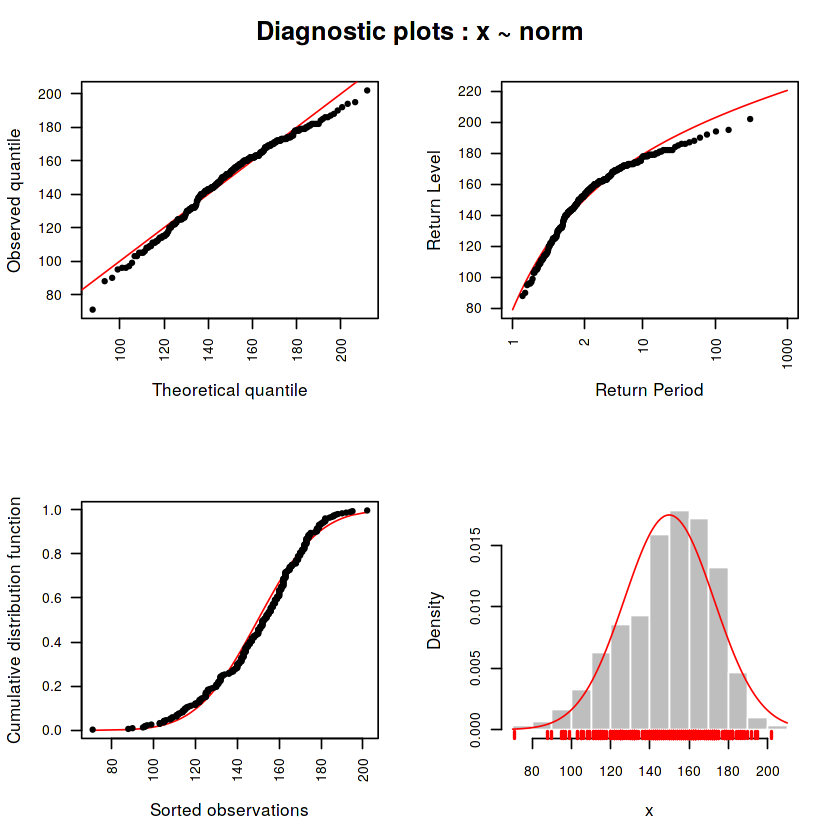

[1] 179.0939 187.3958 202.9687

,p = 0.9,p = 0.95,p = 0.99
low-0.5%,174.5099,182.1864,196.4351
Estimate,179.0939,187.3958,202.9687
up-99.5%,183.6779,192.6051,209.5023


,p = 0.9,p = 0.95,p = 0.99
low-0.5%,174.5681,182.2582,196.5391
Estimate,179.0939,187.3958,202.9687
up-99.5%,183.7370,192.6782,209.6086


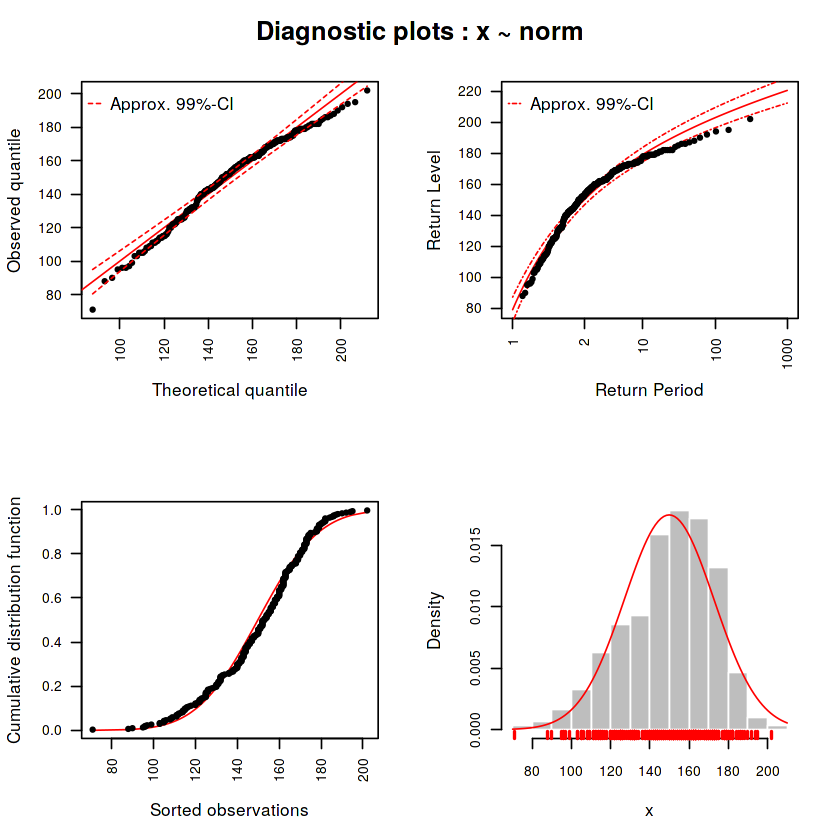

In [5]:
x <- df_heart$thalach
mean(x)
fit.x <- mle(x,'norm',c(.1,0.7))
fit.x
names(fit.x)
plot(fit.x)
plot(fit.x,TRUE,alpha=.01)
p <- c(.9,.95,.99)
distr(p,model=fit.x,type='q')
Q.conf.int(p,fit.x,.01)
Q.conf.int(p,fit.x,.01,TRUE)

Plot 1 (theoretical against observed quantile) is a QQ plot (Quatile Quantile plot). It shows us if two distributions being compared are similar. If they are similar, then the points will appear on the line y = x. If the distributions are linearly related, they might form a line but not nescesarily on x = y.<br>

plot 3 shows the cdf for when we have observed all of the data.

plot 4, with the red color, is an example of estimating the maximum likelihood. The red dots along the x axis show where the distribution could be centered, and a value for the 'likelihood of observing the data' is generated. It then shifts accross until all of the other possible means are used. The distribution mean is then placed at the point where the 'maximum likelihood' of observing all of the data is.